# **Telsa Supercharge Locations Optimization: Exploring Electric Vehicle Charging Stations Across the USA**

## **Problem Description**

In the era of sustainable transportation, Tesla's Supercharger network is pivotal for EV infrastructure. This report analyzes its 11-column dataset to identify geographic and temporal trends and identify potential charging gaps.Contributing insights to sustainable mobility, we navigate data to uncover the intricacies and challenges of Tesla's Supercharger network.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopy.distance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
project_path = '/content/drive/My Drive/MS BA/perspective analytics/project'
os.chdir(project_path)

In [8]:
supercharge_data = pd.read_csv("Supercharge Locations.csv", encoding='latin-1')
supercharge_data.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date,Unnamed: 11
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013,NaN
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013,NaN
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012,NaN
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014,NaN
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014,NaN


## **Dataset**

**Supercharger:** A unique identifier assigned to each Supercharge location.
Name: The name or title associated with the Supercharge location.
Address: The physical address of the Supercharge location, including street name, city, state, and ZIP code.

**GPS:** The GPS coordinates (latitude and longitude) of the station. It offers precise location information for mapping and navigation purposes.

**Latitude:** The geographical latitude coordinate of the Supercharge location.

**Longitude:** The geographical longitude coordinate of the Supercharge location.

**Type:** The type or category of the Supercharge location, such as "Urban" or "Suburban."

**Status:** The current operational status of the Supercharge location, whether it is "Active," "Planned," or "Under Construction."

**Stalls:** The number of charging stalls available at the Supercharge location.

**Power (kW):** The power rating in kilowatts (kW) provided by the Supercharger.

**Phone Number:** The contact phone number associated with the Supercharge location.

**Website:** The website URL for additional information about the Supercharge location.

**City:** The city where the Supercharge location is situated.

**State:** The state or region where the Supercharge location is located.

**ZIP:** The ZIP code associated with the Supercharge location.

**Country:** The country where the Supercharge location is situated, which is likely to be the United States (USA) in this case.

## **Data Cleaning**

Let's organize the dataset

In [9]:
# Drop the Unnamed: 11 column from the dataset
supercharge_data.drop('Unnamed: 11', axis=1, inplace=True)

# Checking for missing or null values
print("Missing values per column:")
print(supercharge_data.isnull().sum())

Missing values per column:
Supercharger         0
Street Address       0
City                 0
State              122
Zip               1929
Country              0
Stalls               0
kW                   6
GPS                  0
Elev(m)              0
Open Date          750
dtype: int64


In [10]:
# Filter the DataFrame for rows where the country is 'USA'
supercharge_usa = supercharge_data[supercharge_data['Country'] == 'USA']

# Checking for missing or null values in the USA subset
print("Missing values for USA per column:")
print(supercharge_usa.isnull().sum())

Missing values for USA per column:
Supercharger        0
Street Address      0
City                0
State               0
Zip                 1
Country             0
Stalls              0
kW                  1
GPS                 0
Elev(m)             0
Open Date         473
dtype: int64


In [11]:
# Impute these missing values.
# Convert 'Open Date' to datetime format
supercharge_usa['Open Date'] = pd.to_datetime(supercharge_usa['Open Date'], format='%m/%d/%Y', errors='coerce')

# Calculate the median date
median_date = supercharge_usa['Open Date'].dropna().median()

# Replace null values with the median date
supercharge_usa['Open Date'].fillna(median_date, inplace=True)
print(supercharge_usa.isnull().sum())

Supercharger      0
Street Address    0
City              0
State             0
Zip               1
Country           0
Stalls            0
kW                1
GPS               0
Elev(m)           0
Open Date         0
dtype: int64


<ipython-input-11-bdf9620edb55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercharge_usa['Open Date'] = pd.to_datetime(supercharge_usa['Open Date'], format='%m/%d/%Y', errors='coerce')
<ipython-input-11-bdf9620edb55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercharge_usa['Open Date'].fillna(median_date, inplace=True)


## **Data Preprocessing**

In [12]:
# Split the 'GPS' column into two new columns: 'Latitude' and 'Longitude'
supercharge_usa[['Latitude', 'Longitude']] = supercharge_usa['GPS'].str.split(', ', expand=True)

# Convert the new columns to float
supercharge_usa['Latitude'] = supercharge_usa['Latitude'].astype(float)
supercharge_usa['Longitude'] = supercharge_usa['Longitude'].astype(float)

# Convert Zip Code to string
supercharge_usa['Zip'] = supercharge_usa['Zip'].astype(str)


<ipython-input-12-bfbbd85b1fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercharge_usa[['Latitude', 'Longitude']] = supercharge_usa['GPS'].str.split(', ', expand=True)
<ipython-input-12-bfbbd85b1fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercharge_usa[['Latitude', 'Longitude']] = supercharge_usa['GPS'].str.split(', ', expand=True)
<ipython-input-12-bfbbd85b1fe1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [13]:
# Drop the GPS column
supercharge_usa.drop(['GPS'],axis= 1).head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,Elev(m),Open Date,Latitude,Longitude
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,114,2013-07-13,34.614560,-120.188387
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,87,2013-10-18,39.926454,-122.198393
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,725,2012-11-19,34.849129,-117.085446
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,92,2014-07-10,31.448847,-83.532210
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,66,2014-04-29,38.771208,-121.266149


In [14]:
supercharge_usa.dtypes

Supercharger              object
Street Address            object
City                      object
State                     object
Zip                       object
Country                   object
Stalls                     int64
kW                       float64
GPS                       object
Elev(m)                    int64
Open Date         datetime64[ns]
Latitude                 float64
Longitude                float64
dtype: object

#<b>EDA

In [15]:
# Descriptive statistics for numerical columns
numerical_columns = ['Stalls', 'kW', 'Elev(m)']
print("Descriptive Statistics for Numerical Columns:")
print(supercharge_usa[numerical_columns].describe())

Descriptive Statistics for Numerical Columns:
            Stalls           kW      Elev(m)
count  2264.000000  2263.000000  2264.000000
mean     11.241608   209.947415   279.725707
std       6.481110    59.330634   436.781657
min       2.000000    72.000000   -11.000000
25%       8.000000   150.000000    27.000000
50%       8.000000   250.000000   130.000000
75%      12.000000   250.000000   284.000000
max      88.000000   250.000000  2956.000000


In [16]:
# Calculate mode - the most frequently occurring value for numerical columns
print("\nMode for Numerical Columns:")
for col in numerical_columns:
    print(f"{col} Mode:", supercharge_usa[col].mode()[0])


Mode for Numerical Columns:
Stalls Mode: 8
kW Mode: 250.0
Elev(m) Mode: 6


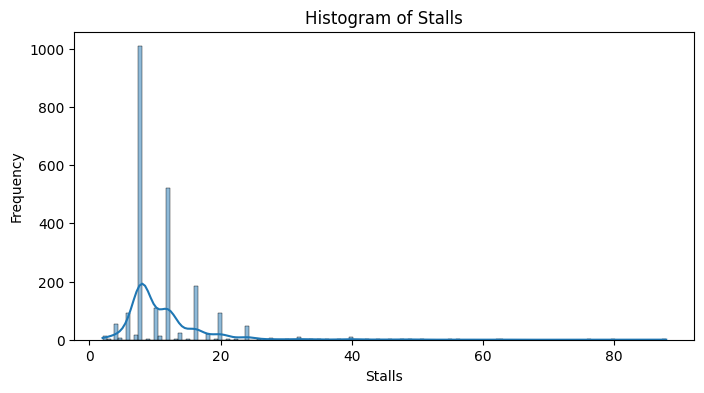

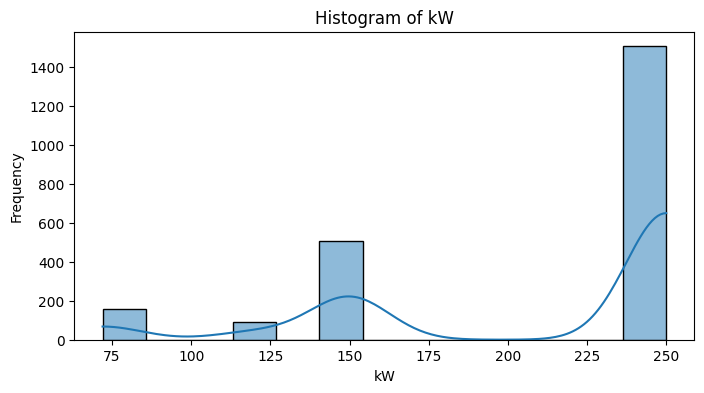

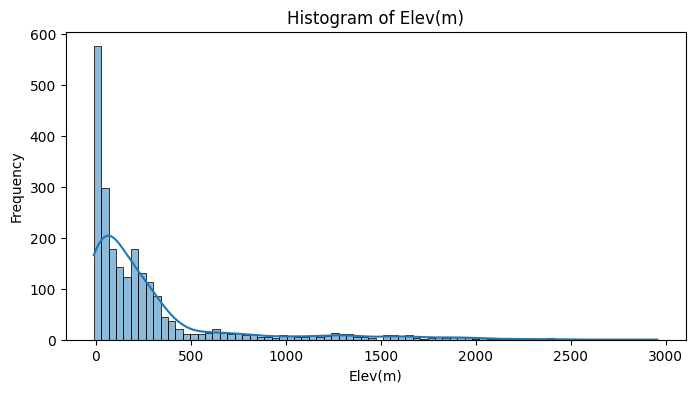

In [17]:
# Plot for numerical variables
numerical_columns = ['Stalls', 'kW', 'Elev(m)']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(supercharge_usa[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

When evaluating the descriptive statistics and frequency plots of our numerical columns, we can see there are large outliers that cause the stalls and elevation histograms suffers from right skewedness while kilowatt histogram suffers from left skewedness.

Let's explore the categorical variables before continuing with our analysis

In [18]:
# Count unique values for categorical data
categorical_columns = ['City', 'State', 'Country']
print("\nCount of Unique Values in Categorical Columns:")
for col in categorical_columns:
    unique_count = supercharge_usa[col].nunique()
    print(f"{col}: {unique_count} unique values")


Count of Unique Values in Categorical Columns:
City: 1515 unique values
State: 52 unique values
Country: 1 unique values


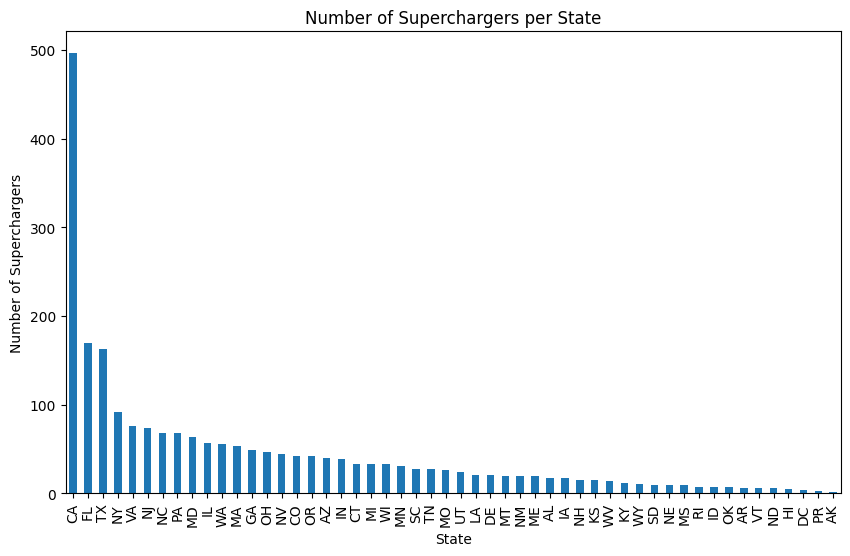

In [19]:
categorical_columns = ['State']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    supercharge_usa[col].value_counts().plot(kind='bar')
    plt.title(f'Number of Superchargers per {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Superchargers')
    plt.show()


Plotting the frequency of Tesla supercharger stations across all states in our dataset, we can see that California is the leader followed distantly by Florida, Texas, New York, and Virginia.

## <b> Categorical Distirbution Analysis

**Categorical Distribution Analysis:** a graphical examination of proportion of superchargers per state distributed across the USA. It aims to provide insights into the relative frequencies or proportions of superchargers observed in each state, which helps team to see their market share in each state.

In [20]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

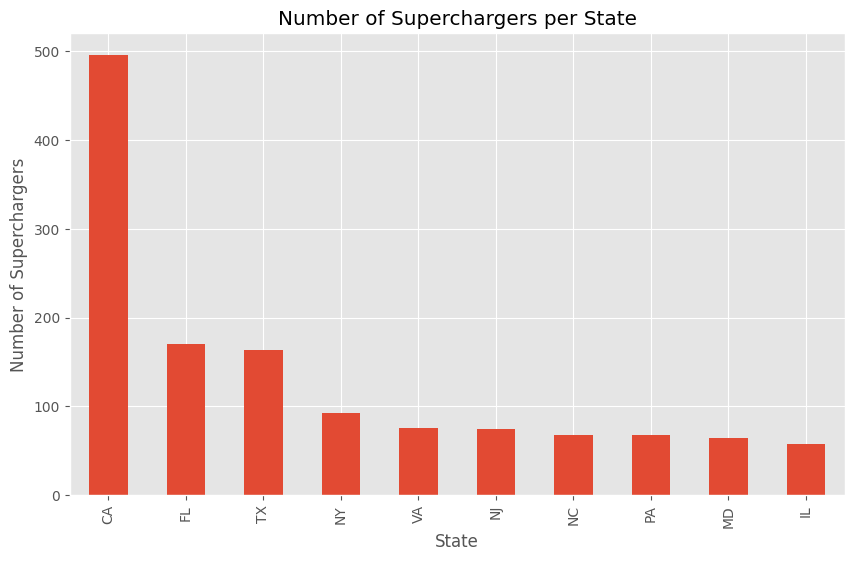

In [30]:
categorical_columns = ['State']

# Get the top five states
top_states = supercharge_usa['State'].value_counts().nlargest(10).index

# Filter the DataFrame for the top five states
df_top_states = supercharge_usa[supercharge_usa['State'].isin(top_states)]

categorical_columns = ['State']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df_top_states[col].value_counts().plot(kind='bar')
    plt.title(f'Number of Superchargers per {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Superchargers')
    plt.show()

When viewing the top states with the highest number of supercharger stations, California has by far the largest number of stations, followed by Florida, Texas, New York, and Virginia. This graphic output shows a series of bar charts similar to the frequency chart seen above.

Lets take a closer look into the proportion of supercharger sttions at these top states in the form of a pie chart.

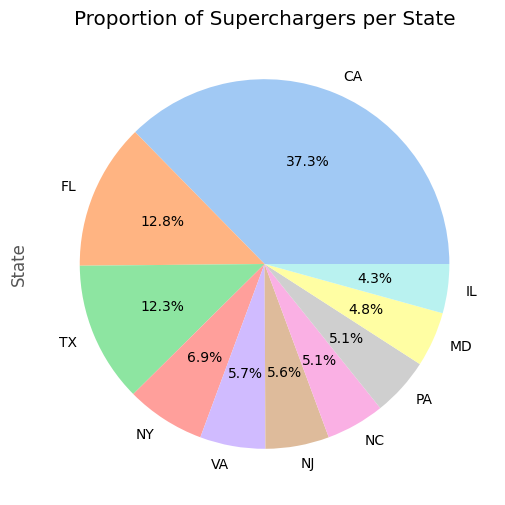

In [28]:
import seaborn as sns

categorical_columns = ['State']

# Get the top five states
top_states = supercharge_usa['State'].value_counts().nlargest(10).index

# Filter the DataFrame for the top five states
df_top_states = supercharge_usa[supercharge_usa['State'].isin(top_states)]

# Use Seaborn color palette
colors = sns.color_palette("pastel", n_colors=len(top_states))

categorical_columns = ['State']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df_top_states[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
    plt.title(f'Proportion of Superchargers per {col}')
    plt.show()

When viewing the chart with proportions of superchargers at the top 10 states, we can see that California is the leader with it representing nearly 40% of the Telsa supercharger ecosystem in the US market. Meanwhile, all other states fall under 15%.

## <b>Time Series Analysis

<b>Forecasting:</b> With time series analysis we can forecast future trends. This is valuable for planning purposes, such as anticipating the need for more superchargers or infrastructure upgrades.<br>
<b>Trend Identification:</b> Time series analysis helps in identifying trends over time. For instance, we can use it to determine periods of rapid growth or slowdown in the installation of superchargers. This is crucial for understanding market dynamics and the adoption rate of electric vehicles.

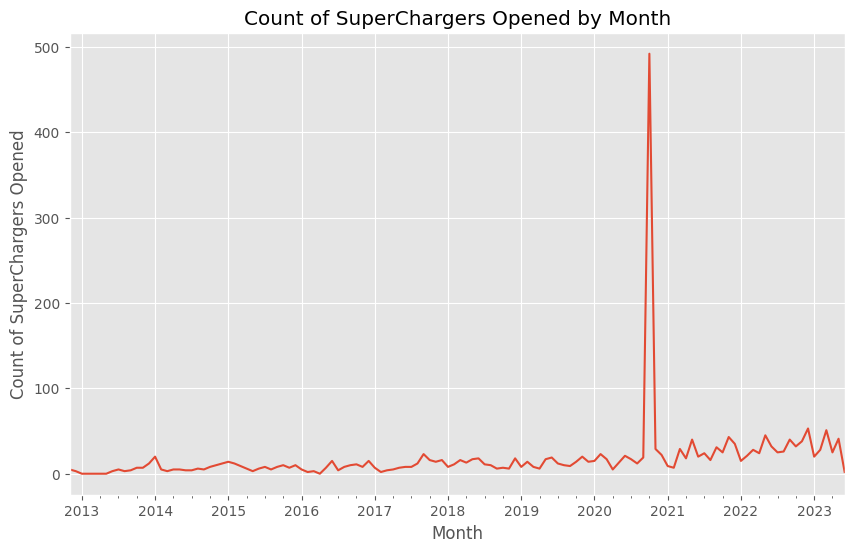

In [23]:
monthly_counts = supercharge_usa.resample('M', on='Open Date').size()

# Visualization
plt.figure(figsize=(10,6))
monthly_counts.plot(kind='line')
plt.title('Count of SuperChargers Opened by Month')
plt.xlabel('Month')
plt.ylabel('Count of SuperChargers Opened')
plt.show()


When performing a time-based analysis of Supercharger openings in the USA, we can visualize the trend of Superchargers opened per month. Following the peak of the COVID-19 pandemic, there was a drastic rise in the number of supercharger stations which informs us that there was a huge spike in demand for EV supercharger stations.  

<ipython-input-24-712677da5255>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercharge_usa['Year'] = supercharge_usa['Open Date'].dt.year


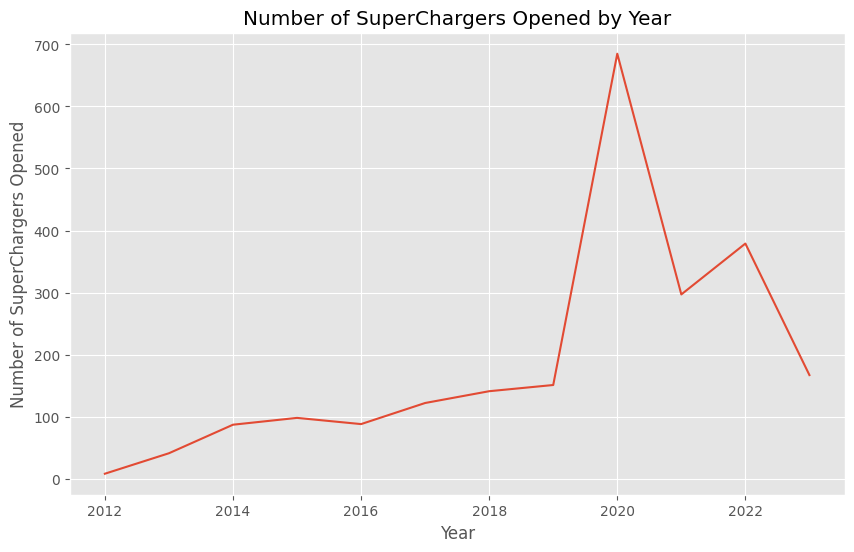

In [24]:
# Extract the year from 'OpenDate'
supercharge_usa['Year'] = supercharge_usa['Open Date'].dt.year

# Group by 'Year' and count the number of superchargers in each year
counts = supercharge_usa.groupby('Year').size()

# Line chart
plt.figure(figsize=(10,6))
counts.plot(kind='line')
plt.title('Number of SuperChargers Opened by Year')
plt.xlabel('Year')
plt.ylabel('Number of SuperChargers Opened')
plt.show()

When viewing the annual trend of Supercharger opened from 2012 to 2023 you can see a exponential increase in the number of Supercharger stations from 2019 to 2020 which representing the drastic rise in demand for Supercharger stations. This is followed by a significant drop off from 2020 to 2023, which suggests a slow down in the EV market.

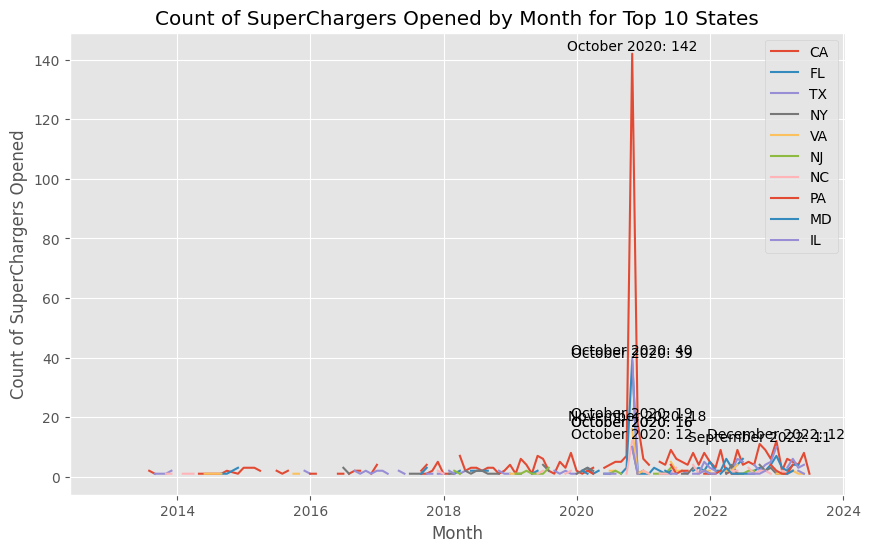

In [25]:
# Group by month and state, count superchargers, and unstack to create a column for each state
monthly_counts = df_top_states.groupby([pd.Grouper(key='Open Date', freq='M'), 'State']).size().unstack()

# Visualization
plt.figure(figsize=(10,6))
for state in top_states:
    plt.plot(monthly_counts.index, monthly_counts[state], label=state)
    # Label points greater than a certain threshold
    threshold = 10
    above_threshold = monthly_counts[state] > threshold
    for date, count in monthly_counts[above_threshold][state].items():
        plt.text(date, count, f'{date.strftime("%B %Y")}: {count:.0f}', ha='center', va='bottom')
plt.title('Count of SuperChargers Opened by Month for Top 10 States')
plt.xlabel('Month')
plt.ylabel('Count of SuperChargers Opened')
plt.legend()
plt.show()

<ipython-input-31-93ba1a819a3e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercharge_usa['Open Date'] = pd.to_datetime(supercharge_usa['Open Date'])


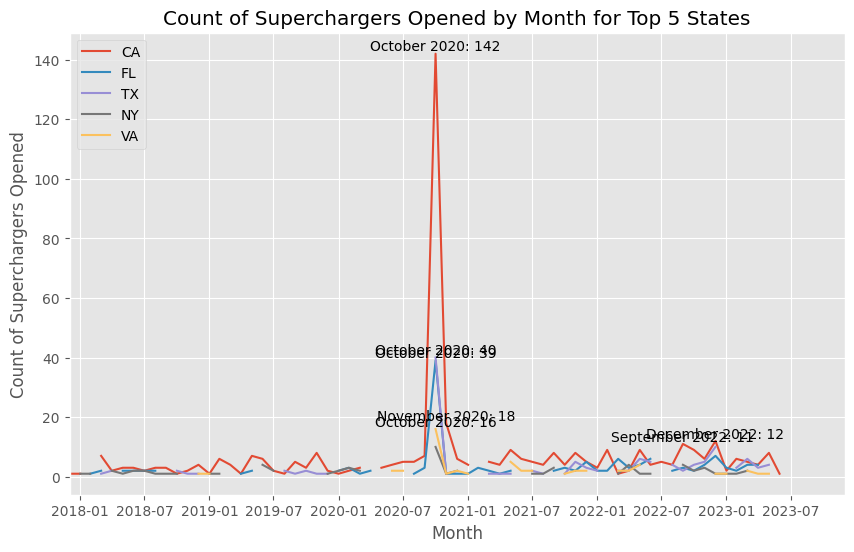

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top five states
top_states = supercharge_usa['State'].value_counts().nlargest(5).index

# Filter the DataFrame for the top five states
df_top_states = supercharge_usa[supercharge_usa['State'].isin(top_states)]

# Assuming 'Open Date' is a datetime column
supercharge_usa['Open Date'] = pd.to_datetime(supercharge_usa['Open Date'])

# Filter data for the range 2018-01-01 to 2022-12-31
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-12-31')
df_filtered = supercharge_usa[(supercharge_usa['Open Date'] >= start_date) & (supercharge_usa['Open Date'] <= end_date)]

# Group by month and state, count superchargers, and unstack to create a column for each state
monthly_counts = df_top_states.groupby([pd.Grouper(key='Open Date', freq='M'), 'State']).size().unstack()

# Visualization
plt.figure(figsize=(10, 6))
for state in top_states:
    plt.plot(monthly_counts.index, monthly_counts[state], label=state)
    # Label points greater than a certain threshold
    threshold = 10
    above_threshold = monthly_counts[state] > threshold
    for date, count in monthly_counts[above_threshold][state].items():
        plt.text(date, count, f'{date.strftime("%B %Y")}: {count:.0f}', ha='center', va='bottom')

# Set x-axis limits and ticks for better readability
plt.xlim(start_date, end_date)
plt.xticks(pd.date_range(start_date, end_date, freq='6M'), [d.strftime('%Y-%m') for d in pd.date_range(start_date, end_date, freq='6M')])

plt.title('Count of Superchargers Opened by Month for Top 5 States')
plt.xlabel('Month')
plt.ylabel('Count of Superchargers Opened')
plt.legend(loc='upper left')
plt.show()

When viewing the groups of supercharger stations opened by month for the top 5 states, we can visualizes the point where the count exceeds the threshold 9 times. In October 2020, the highest number of supercharger stations were opened in California exceeding the threshold by nearly 142 stations.

## <b>Resource Allocation Analysis

<b> Resource Allocation and Planning:</b> Understanding regional variations helps in efficient allocation of resources. For instance, states with higher traffic may require more stalls or higher power capacity. This analysis can inform where to invest in new infrastructure or upgrade existing facilities.

In [33]:
# Get the top five states
top_states = supercharge_usa['State'].value_counts().nlargest(10).index

# Filter the DataFrame for the top five states
df_top_states = supercharge_usa[supercharge_usa['State'].isin(top_states)]

# To analyze regional differences such as the average power capacity or number of stalls per supercharger by state
# Group by 'State' and calculate the mean for 'Power capacity' and 'Number of charging stalls'
grouped_data = df_top_states.groupby('State')[['kW', 'Stalls']].mean()

# Resetting the index to get 'State' as a column
grouped_data = grouped_data.reset_index()

# Display the grouped data
print(grouped_data)

  State          kW     Stalls
0    CA  208.610887  15.883065
1    FL  219.447059  10.400000
2    IL  207.789474  11.017544
3    MD  214.718750   8.640625
4    NC  224.117647  10.367647
5    NJ  215.324324   9.770270
6    NY  187.065217   9.304348
7    PA  217.294118   8.911765
8    TX  216.558282  11.601227
9    VA  219.421053   9.144737


<Figure size 1000x600 with 0 Axes>

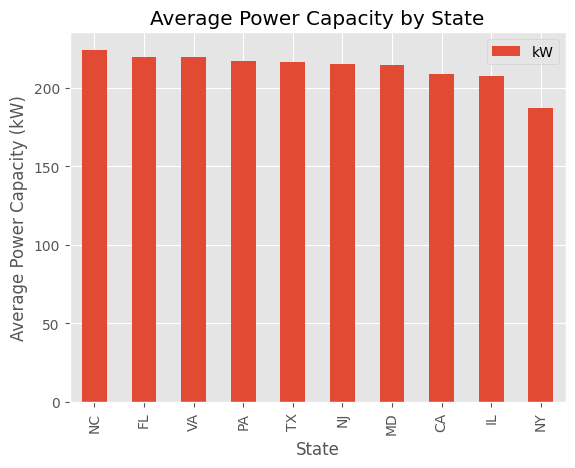

In [34]:
# Plotting the average power capacity by state
plt.figure(figsize=(10,6))
grouped_data.sort_values(by='kW', ascending=False).plot(x='State', y='kW', kind='bar')
plt.title('Average Power Capacity by State')
plt.xlabel('State')
plt.ylabel('Average Power Capacity (kW)')
plt.show()

When you visualize the average power capacity by states, you can see that SouthEast states such as North Carolina, Florida, and Virginia are the leaders. This is followed closely behind Pennsylvania, Texas, and New Jersey. These developed and smaller metropolitan cities suggests their infrastructure for producing large amounts of energy is relatively higher than highly condense, larger metropolitan cities such as California and New York.

<Figure size 1000x600 with 0 Axes>

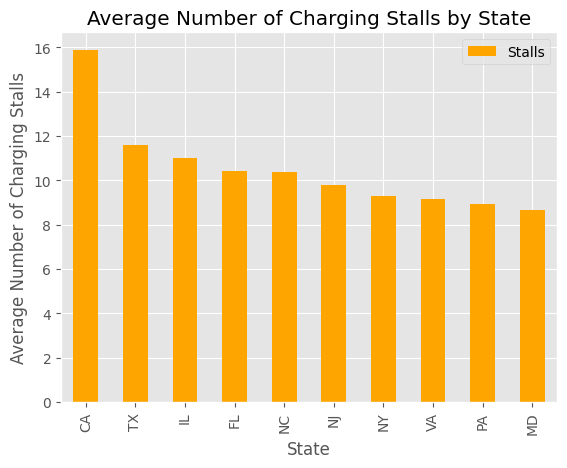

In [35]:
# Plotting the average number of charging stalls by state
plt.figure(figsize=(10,6))
grouped_data.sort_values(by='Stalls', ascending=False).plot(x='State', y='Stalls', kind='bar', color='orange')
plt.title('Average Number of Charging Stalls by State')
plt.xlabel('State')
plt.ylabel('Average Number of Charging Stalls')
plt.show()

When you visualize the average number of charging stalls by states, you can see that highly condense, larger metropolitan cities such as California, Texas, and Illinous.

#<b>Multivariate Analysis

**Multivariate analysis:** explore relationships involving three or more variables. Here we can check how variables like power capacity(kW), elevation, and the number of charging stalls vary by state.

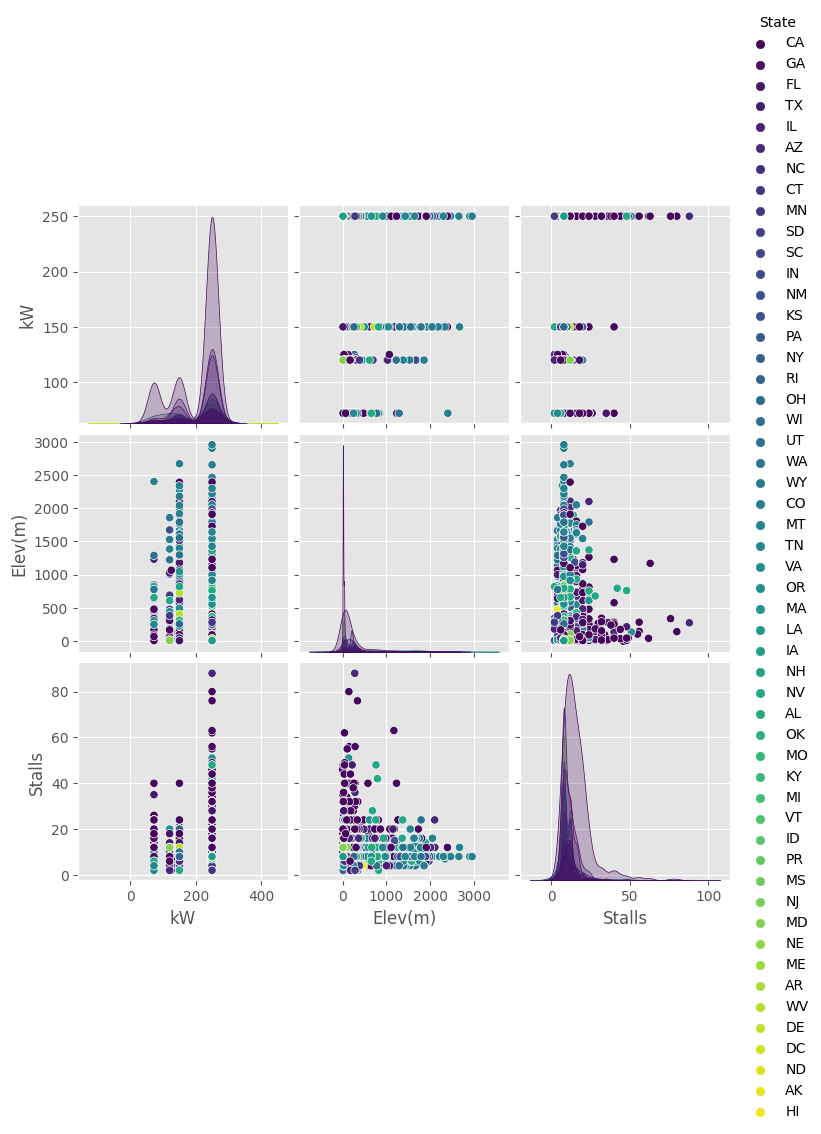

In [36]:
# Selecting a subset of variables for multivariate analysis
# Replace these with the actual column names from your dataset
variables_of_interest = ['kW', 'Elev(m)', 'Stalls', 'State']

# Filter the DataFrame for these variables
supercharge_usa_subset = supercharge_usa[variables_of_interest]

# Creating the pair plot
sns.pairplot(supercharge_usa_subset, hue='State', diag_kind='kde', palette='viridis')
plt.show()


When you explore the relationships between the `kW`, `Elev (m)`, and `Stalls` across different states, the pair plot provides scatterplots for each variable pairs and KDE plots for individual variables.

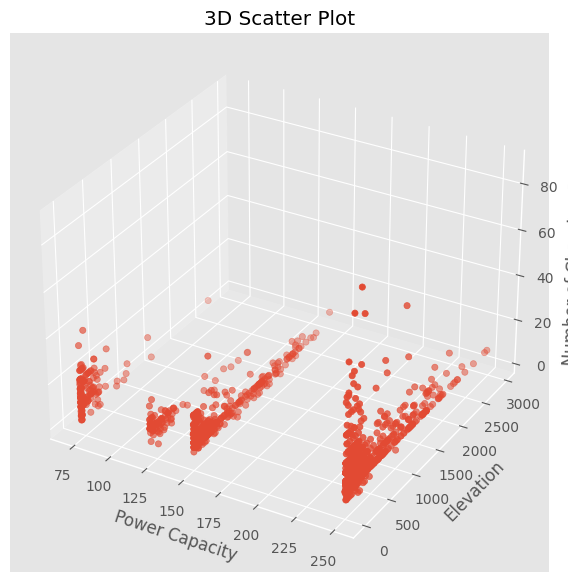

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Filter the DataFrame for variables for the 3D plot
# Here, using 'Power capacity', 'Elevation', and 'Number of charging stalls' as an example
supercharge_usa_3d = supercharge_usa[['kW', 'Elev(m)', 'Stalls']]

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(supercharge_usa_3d['kW'], supercharge_usa_3d['Elev(m)'], supercharge_usa_3d['Stalls'])

# Setting labels
ax.set_xlabel('Power Capacity')
ax.set_ylabel('Elevation')
ax.set_zlabel('Number of Charging Stalls')

plt.title('3D Scatter Plot')
plt.show()

When you explore a 3D scatter plot to visualize the relationships between `Power Capacity`, `Elevation`, and `Number of Charging Stalls` for data entries in the DataFrame. The plot allows you to explore the distribution and patterns in three-dimensional space, providing insights into the dataset's structure.

## <b> Geospatial Analysis

<b>Identifying Coverage Gaps:</b> Mapping can reveal areas that are underserved by superchargers. This information is crucial for planning the expansion of the charging network to ensure adequate coverage and convenience for electric vehicle (EV) users. <br>
<b>Strategic Planning:</b> For businesses and policymakers, the geographic visualization aids in strategic decision-making regarding where to invest in additional infrastructure, considering factors like population density, traffic patterns, and proximity to major highways.

In [38]:
supercharge_usa.shape

(2264, 14)

In [39]:
!pip install plotly-geo==1.0.0
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.7/888.7 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.17.0 requires geopandas>=0.12.2, but you have geopandas 0.3.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyshp: filename=pyshp-1.2.10-p

In [40]:
import plotly.express as px

# Create the USA map plot
fig = px.scatter_mapbox(supercharge_usa, lat='Latitude', lon='Longitude', hover_name='Supercharger',
                        hover_data=['Street Address', 'City', 'State', 'Zip'],
                        color_discrete_sequence=['blue'], zoom=3, height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title_text='Supercharger Locations in the USA')
fig.update_layout(margin={'r': 0, 't': 30, 'l': 0, 'b': 0})

# Display the plot
fig.show()

When creating an interactive map plot using Plotly Express, we can see the locations of superchargers in the USA. The map reveals information on areas that are underserved in supercharger stalls. There is clearly a concentration of supercharger stalls on the West and East coast, while there are less located in the central US.

## **Minimizing Geographical Distribution of EV Charging Stations**

## Model Formulation

### Sets and Indices

$x \in \text{Newly Built Charging Stations}=\{\text{1}, \text{0}\}$

$d \in \text{Distance}=\{\text{Location i}, \text{Location j}\}$

### Decision Variables

$\text{x}_{i} \in \mathbb{1, 0}$: Whether a charging station is newly built at location $i$.

$\text{d}_{i,j} \in \mathbb{D}^{+}$: Distance between the newly built location $i$ and $j$.

### Objective Function

- **Distance**: Minimize the total distance between newly built EV supercharging stations.

\begin{equation}
\text{Minimize} \quad Z = \sum_{i = \text{1}} \sum_{j = \text{1}} {\text{D}_{i,j}*\text{x}_{i} *\text{x}_{j}}
\end{equation}

### Constraints

- **Station Constraint**: For each station $i$ selected in the route, number of stations $x_i$, should be between the minimum and maximum number of charging stations.

\begin{equation}
\text{Min Charging Stations} \leq \sum_{\text{i=1}}{\text{$x_i$}} \leq \text{Max Charging Stations}
\end{equation}

- **Non-Binary Constraint**: Ensure that each new location is either selected or not:

\begin{equation}
{x_i \in \text{0,1}}{} \quad \forall i \in \text{1, 2, ..., N}
\end{equation}

**Objective**: Using GPS coordinates we plan to construct a network graph where nodes will represent Supercharger stations and edges will represent possible paths between them. With this graph we can solve the optimization problem of finding the shortest path between two points.

Firstly, lets filter out our US supercharge dataframe to only include the EV supercharger stations from state of California. Additionally, the range of dates that we're interested in are the supercharger stations opened between the beginning of 2019 and end of Q3 in 2023.   

In [41]:
# Filter the DataFrame for rows where the state is 'CA'
supercharge_usa = supercharge_usa[(supercharge_usa['State'] == 'CA')]

# Specify the range of dates you want to filter
start_date = '2019-01-01'
end_date = '2023-12-31'

# Filter the DataFrame based on the specified range of dates
supercharge_usa = supercharge_usa[(supercharge_usa['Open Date'] >= start_date) & (supercharge_usa['Open Date'] <= end_date)]

# Checking for missing or null values in the USA subset
print("Missing values for USA per column:")
print(supercharge_usa.isnull().sum())

Missing values for USA per column:
Supercharger      0
Street Address    0
City              0
State             0
Zip               0
Country           0
Stalls            0
kW                0
GPS               0
Elev(m)           0
Open Date         0
Latitude          0
Longitude         0
Year              0
dtype: int64


In [42]:
supercharge_usa['Open Date'] = pd.to_datetime(supercharge_usa['Open Date'])
recent_stations = supercharge_usa.sort_values('Open Date', ascending=False)

In [43]:
# Drop the GPS column
supercharge_usa.drop(['GPS'],axis= 1,inplace=True)

In [44]:
supercharge_usa.dtypes

Supercharger              object
Street Address            object
City                      object
State                     object
Zip                       object
Country                   object
Stalls                     int64
kW                       float64
Elev(m)                    int64
Open Date         datetime64[ns]
Latitude                 float64
Longitude                float64
Year                       int64
dtype: object

In [45]:
!pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.8 MB/s eta 0:00:00


In [46]:
# @title Gurobi Academic License
from gurobipy import *
import gurobipy as gp
import geopy.distance
from gurobipy import Model, GRB, quicksum

# Create an environment with your WLS license
params = {
"WLSACCESSID": '3da2f18c-5f84-4b07-9fcd-53c977b96d0f',
"WLSSECRET": 'd03e56f8-4888-4ce3-ad22-86c256730efe',
"LICENSEID": 2447680
}
env = gp.Env(params=params)

# Create the model within the Gurobi environment
model = gp.Model(env=env)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2447680
Academic license 2447680 - for non-commercial use only - registered to an___@scu.edu


<b>Decision Variables


The decision variables for the objective function have been created based on unique identifiers generated for electric vehicle charging stations. The process begins by forming a unique identifier for each station using relevant information such as `Supercharger`, `Street Address`, `City`, `State`, and `Zip code`. The resulting unique identifiers are stored in the `unique_id` column of the `recent_stations` dataset.

In [47]:
# Creating an unique identifier
recent_stations['unique_id'] = recent_stations['Supercharger'] + "_" + recent_stations['Street Address'] + "_" + recent_stations['City'] + "_" + recent_stations['State'] + "_" + recent_stations['Zip']
station_ids = recent_stations['unique_id'].tolist()


To identify duplicate entries, a subset of the `recent_stations` dataset containing duplicated `unique_id` values is extracted and stored in the 'duplicates' variable.

In [48]:
duplicates = recent_stations[recent_stations['unique_id'].duplicated(keep=False)]
duplicates

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date,Latitude,Longitude,Year,unique_id


Subsequently, if additional columns (`Latitude` and `Longitude`) were exclusively added to the `supercharger_usa` dataset, they are incorporated into the `recent_stations` dataset as well. This involves splitting the `GPS` column into latitude and longitude components, converting them to float type, and updating the corresponding columns in `recent_stations`.

In [49]:
# If these columns were only added to supercharger_usa, add them to recent_stations as well
recent_stations[['Latitude', 'Longitude']] = recent_stations['GPS'].str.split(', ', expand=True)
recent_stations['Latitude'] = recent_stations['Latitude'].astype(float)
recent_stations['Longitude'] = recent_stations['Longitude'].astype(float)

In [50]:
recent_stations.set_index('unique_id', inplace=True)

In [51]:
# Drop the GPS column
recent_stations.drop(['GPS'],axis= 1,inplace=True)

In [52]:
recent_stations.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,Elev(m),Open Date,Latitude,Longitude,Year
unique_id,,,,,,,,,,,,,
"Walnut Creek, CA_2290 Oak Grove Rd_Walnut Creek_CA_94598","Walnut Creek, CA",2290 Oak Grove Rd,Walnut Creek,CA,94598,USA,12,250.0,37,2023-06-02,37.930078,-122.014812,2023
"Tustin - Franklin Ave, CA_14461 Franklin Ave_Tustin_CA_92780","Tustin - Franklin Ave, CA",14461 Franklin Ave,Tustin,CA,92780,USA,36,250.0,19,2023-05-26,33.716605,-117.810303,2023
"Yorba Linda, CA_18601 Yorba Linda Blvd_Yorba Linda_CA_92886","Yorba Linda, CA",18601 Yorba Linda Blvd,Yorba Linda,CA,92886,USA,8,250.0,121,2023-05-25,33.889175,-117.808082,2023
"Grass Valley, CA_692 Freeman Lane_Grass Valley_CA_95949","Grass Valley, CA",692 Freeman Lane,Grass Valley,CA,95949,USA,12,250.0,744,2023-05-25,39.199798,-121.064216,2023
"Yermo - Sunrise Canyon Rd, CA_40865 Sunrise Canyon Rd_Yermo_CA_92398","Yermo - Sunrise Canyon Rd, CA",40865 Sunrise Canyon Rd,Yermo,CA,92398,USA,40,250.0,577,2023-05-24,34.919528,-116.769185,2023


The decision variables `station_vars` are each charging station assigned to a binary decision variable (0 or 1) denoted by the unique identifiers in `station_ids`. These variables are created with the specified variable type (GRB.BINARY) and are named "Station" within the optimization model.

In [53]:
station_vars = model.addVars(station_ids, vtype=GRB.BINARY, name="Station")

<b>Objective Function

A distance calculation function, named calculate_distance, is defined to compute the distance in miles between two charging stations. The function takes two station objects as input and uses their latitude and longitude coordinates to calculate the distance in kilometers, which is then converted to miles (multiplying by 0.621371).

In [54]:
# define a function to calculate distances in miles
def calculate_distance(station1, station2):
    coords_1 = (station1['Latitude'], station1['Longitude'])
    coords_2 = (station2['Latitude'], station2['Longitude'])
    return geopy.distance.distance(coords_1, coords_2).km * 0.621371

The objective is defined as the sum of distances between station pairs, multiplied by their corresponding binary decision variables. The summation is performed over all pairs of charging stations (i, j) where i is not equal to j. Finally, the objective function is assigned to the optimization model (model) using the setObjective method.

In [55]:
objective = gp.quicksum(calculate_distance(recent_stations.loc[i], recent_stations.loc[j]) *
                        station_vars[i] * station_vars[j]
                        for i in station_ids for j in station_ids if i != j)
model.setObjective(objective, GRB.MINIMIZE)

The goal is to minimize the total distance, and the optimization model is configured accordingly.

<b>Constraints

The constraints for the optimization model are established based on estimates and projections related to electric vehicle (EV) demand and charging station requirements. Our team is interested in minimizing the distance between newly built EV charging stations in California.

In [56]:
# Estimate of yearly sales in California given the ratio of Telsa supercharger stations over a similar period of time and a more comprehensive calculated
# Tesla yearly car sales (https://finance.yahoo.com/news/california-ev-sales-top-20-through-q3-with-teslas-model-y-leading-the-way-162349292.html)
data = {
    2019: 99048,
    2020: 92396,
    2021: 161863,
    2022: 260702,
    2023: 291518 # Approx estimation (290,000 were the sales until Q3)
}

# Calculating the percentage increase for each year compared to the previous year
percentage_increase = {}
for year in range(2020, 2024):
    increase = (data[year] - data[year - 1]) / data[year - 1] * 100
    percentage_increase[year] = increase

percentage_increase

{2020: -6.715935707939585,
 2021: 75.18399064894584,
 2022: 61.06336840414425,
 2023: 11.82039263220075}

As shown above, the future demand for EV charging stations is projected based on the estimated number of EVs in California, the average charging time, operational hours, and the average number of chargers per station.

In [57]:
average_increase = sum(percentage_increase.values()) / len(percentage_increase)
average_increase

35.33795399433781

Now we initialize and compute parameters for electric vehicle (EV) charging infrastructure in California. It estimates current and future demand based on EV numbers, average charging time, operational hours, and population growth. The projection considers average Tesla sales growth, resulting in calculations for minimum and maximum required charging stations. The script outputs the current minimum stations needed and the projected range for future stations.

In [58]:
# Initial Data
estimated_number_of_EVs = 100000  # Estimated number of EVs cars in California (https://insideevs.com/news/694269/california-electric-car-sales-2023q3/)
average_charging_time = 0.5  # in hours
operational_hours = 24
number_of_chargers_per_station = 10 # Average number of chargers per station worldwide (https://www.iea.org/reports/global-ev-outlook-2022/trends-in-charging-infrastructure)

# Tesla yearly average percentage increase
average_increase_percentage = sum(percentage_increase.values()) / len(percentage_increase)

# Assume a constant annual population growth rate
annual_population_growth_rate = 0.01 # 1% growth

# Future projection years
projection_years = 4  # Projecting for the next 5 years

# Future EV Demand Calculation
future_EV_demand = estimated_number_of_EVs
for year in range(projection_years):
    # Increasing EV demand by the average Tesla sales growth rate
    future_EV_demand *= (1 + average_increase_percentage / 100)
    # Adjusting for population growth
    future_EV_demand *= (1 + annual_population_growth_rate)

# Estimating current demand for charging stations
current_demand = estimated_number_of_EVs
charging_time_per_cycle = average_charging_time
total_charging_time = operational_hours * number_of_chargers_per_station
cycles_per_station = total_charging_time / charging_time_per_cycle
min_stations = current_demand / cycles_per_station

# Calculating Future Demand for Charging Stations
future_demand_for_stations = future_EV_demand / cycles_per_station

# Calculating Growth Rate in Demand for Charging Stations
growth_rate = ((future_demand_for_stations - min_stations) / min_stations) * 100

# Maximum Stations Calculation
max_stations = min_stations * (1 + growth_rate / 100)

print("Minimum Stations Required Now:", min_stations)
print("Maximum Stations Required in Future:", max_stations)

Minimum Stations Required Now: 208.33333333333334
Maximum Stations Required in Future: 727.3152342089129


The results indicate the estimated requirements for electric vehicle (EV) charging stations. A minimum of approximately 208 charging stations is deemed necessary to meet the demand. The calculated projection suggests that the demand may increase, necessitating a maximum of around 727 charging stations to adequately accommodate the expected growth in electric vehicles over the next 4 projected years.


Lets add these constraints to our optimization model. The first constraint enforces that the sum of the binary decision variables (`station_vars`) representing selected charging stations must be greater than or equal to the minimum number of stations required (`min_stations`). The second constraint ensures that the sum of these decision variables does not exceed the calculated maximum number of stations needed (`max_stations`).

In [59]:
# Add constraints
model.addConstr(station_vars.sum() >= min_stations, "MinStations")
model.addConstr(station_vars.sum() <= max_stations, "MaxStations")


<gurobi.Constr *Awaiting Model Update*>

<b> Optimize

In [60]:
model.Params.MIPGap=0.10

Set parameter MIPGap to value 0.1


In [61]:
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2447680 - for non-commercial use only - registered to an___@scu.edu
Optimize a model with 2 rows, 405 columns and 810 nonzeros
Model fingerprint: 0xcf7eea63
Model has 81810 quadratic objective terms
Variable types: 0 continuous, 405 integer (405 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-01, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 7e+02]
Found heuristic solution: objective 3.577194e+07
Found heuristic solution: objective 9455667.7777
Presolve removed 1 rows and 0 columns
Presolve time: 0.26s
Presolved: 1 rows, 405 columns, 405 nonzeros
Presolved model has 82215 quadratic objective terms
Variable types: 0 continuous, 405 integer (405

The optimization results suggests a presolve step removing redundant constraints and variables, resulting in a reduced problem size. The root was interrupted after 472 iterations, and the optimization explored 1 node. The optimal solution with an objective value of approximately 3.24 million. The best lower bound on the optimal objective value is around 2.92 million, resulting in a small optimality gap of approximately 9.99%.

Lets figure out the optimal locations where California stations should be built. If the status is optimal:

Here's a breakdown of the code:

**Initialization:** The selected_stations list is initialized to store the stations selected for building.

**Optimality Check:** It checks if the optimization model's status is optimal (model.status == GRB.OPTIMAL). This condition ensures that a feasible and optimal solution has been found.

**Solution Retrieval:** If the solution is optimal, it retrieves the values of the decision variables (stations) from the optimization model using model.getAttr('x', station_vars). The solution is stored in the solution variable.

**Selection of Stations:** It iterates over the solution to identify stations with positive decision variable values (solution[station] > 0). For each selected station, it appends the station name to the selected_stations list and prints a message indicating that the station should be built.

The resulting selected_stations list contains the names of the stations that the optimization model recommends for construction based on the optimal solution.

In [62]:
selected_stations = []

if model.status == GRB.OPTIMAL:
    solution = model.getAttr('x', station_vars)
    for station in solution:
        if solution[station] > 0:
            selected_stations.append(station)
            print(f"Station {station}: Build")


Station Tustin - Franklin Ave, CA_14461 Franklin Ave_Tustin_CA_92780: Build
Station Yorba Linda, CA_18601 Yorba Linda Blvd_Yorba Linda_CA_92886: Build
Station Yermo - Sunrise Canyon Rd, CA_40865 Sunrise Canyon Rd_Yermo_CA_92398: Build
Station Long Beach - Long Beach Blvd, CA_6590 Long Beach Blvd_Long Beach_CA_90805: Build
Station Carlsbad - Van Allen Way, CA_5806 Van Allen Way_Carlsbad_CA_92008: Build
Station Costa Mesa - Hyland Ave, CA_3303 Hyland Ave_Costa Mesa_CA_92626: Build
Station Cypress, CA_4959 Katella Ave_Cypress_CA_90720: Build
Station Pasadena - E Colorado Blvd, CA_3500 E Colorado Blvd_Pasadena_CA_91107: Build
Station Commerce - Telegraph Rd, CA_6131 Telegraph Rd_Commerce_CA_90040: Build
Station Los Angeles - Venice Blvd, CA_8985 Venice Blvd_Los Angeles_CA_90034: Build
Station Newhall, CA_23502 Newhall Ave_Santa Clarita_CA_91321: Build
Station Lake Forest - Muirlands Blvd, CA_24301 Muirlands Blvd_Lake Forest_CA_92630: Build
Station Chula Vista - Showroom Pl, CA_881 Showroom

By the output and identifying recurring locations (cities) such as Los Angeles, San Diego, and Irvine, we can infer areas with potentially higher demand for charging stations, helping you make informed decisions on station placement and resource allocation.